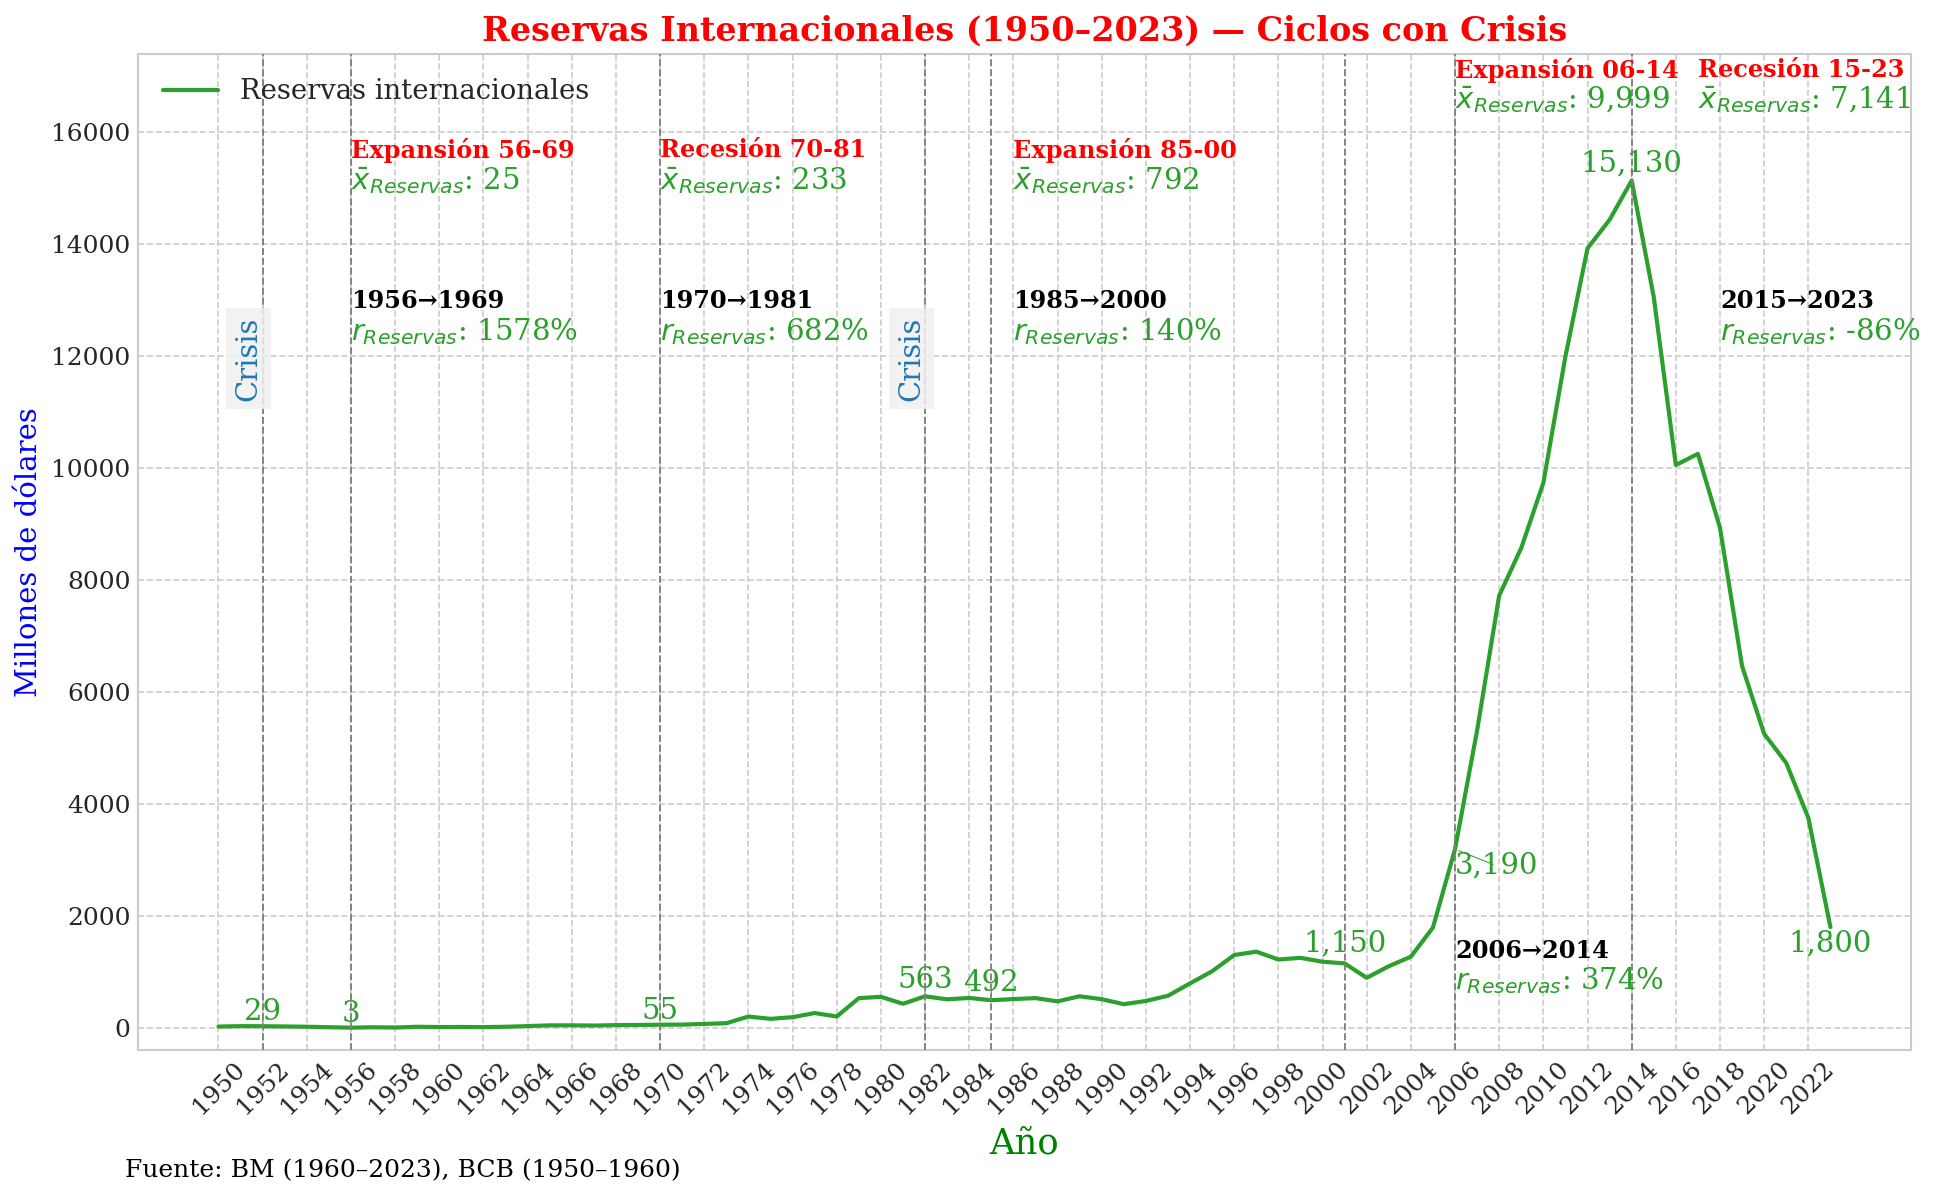

In [2]:
# ─────────────────────────────────────────────────────────────
# Importaciones comunes
# ─────────────────────────────────────────────────────────────
import sys, os, sqlite3
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../'))  # utilidades propias
from graficos_utils import *
from config import (
    CYCLES, annot_years, periodos_tasas, hitos_v,
    CYCLES_SIN_CRISIS, annot_years_sin_crisis, periodos_tasas_sin_crisis, hitos_v_sin_crisis,
    CYCLES_PERIODOS, annot_years_periodos, periodos_tasas_periodos, hitos_v_periodos,
)

# Directorio de salida y estilo
output_dir = "../../../../assets/tesis/serie_completa/reservas_int"
os.makedirs(output_dir, exist_ok=True)
set_style()

# ─────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────
with sqlite3.connect('../../../../db/proyectomacro.db') as conn:
    df_res = (
        pd.read_sql('SELECT año, reservas_totales FROM Reservas_oro_divisas', conn)
          .set_index('año')
          .sort_index()
    )

# ─────────────────────────────────────────────────────────────
# Componentes
# ─────────────────────────────────────────────────────────────
componentes = [('reservas_totales', 'Reservas internacionales')]
cols_componentes = ['reservas_totales']
abbr_map = {'reservas_totales': 'Reservas'}
custom_colors = {'reservas_totales': '#2ca02c'}  # verde

# ============================================================
# 1) CON CRISIS
# ============================================================
annotate_years = adjust_annot_years(df_res, annot_years)
cycles_stats   = {n: df_res.loc[s, cols_componentes].mean().to_dict()
                  for n, s in adjust_cycles(df_res, CYCLES).items()}
periodos       = adjust_periods(df_res, periodos_tasas)

annotation_offsets = {
    'reservas_totales': {
        1952: (0,   250),
        1956: (0,   250),
        1970: (0,   250),
        1982: (0,   300),
        1985: (0,   300),   # antes 1986 → 1985
        2001: (0,   350),   # antes 2000 → 2001
        2006: (1.9, -300),
        2014: (0,   300),
        2023: (0,  -300),
    },
}

# 2) Hitos verticales
hitos_offset = {a: 0.8 for a in hitos_v}

# 3) Posición de medias por ciclo (claves según CYCLES)
medias_offsets = {
    'Expansión 56-69': (1956, 1),
    'Recesión 70-81':  (1970, 1),
    'Expansión 85-00': (1986, 1),   # antes "Expansión 86-99"
    'Expansión 06-14': (2006, 1.09),# antes "Expansión 06-13"
    'Recesión 15-23':  (2017, 1.09),# antes "Recesión 14-23"
}

# 4) Tasas de crecimiento anotadas por periodo (claves según periodos_tasas)
tasas_offsets = {
    '1956-1969': (1956, 0.83),  # antes "1956-1970"
    '1970-1981': (1970, 0.83),  # antes "1970-1986"
    '1985-2000': (1986, 0.83),  # antes "1986-2000"
    '2006-2014': (2006, 0.10),
    '2015-2023': (2018, 0.83),  # antes "2014-2023"
}

fig, ax = init_base_plot(
    df_res, componentes, custom_colors,
    "Reservas Internacionales (1950–2023) — Ciclos con Crisis",
    "Año", "Millones de dólares",
    source_text="Fuente: BM (1960–2023), BCB (1950–1960)"
)
add_hitos(ax, df_res.index, hitos_v, hitos_offset, line_kwargs={'lw':0.9})
add_cycle_means_multi(ax, cycles_stats, medias_offsets, abbr_map, custom_colors,
                      line_spacing=ax.get_ylim()[1]*0.03)
add_year_value_annotations(ax, df_res, annotate_years, cols_componentes,
                           annotation_offsets, custom_colors, arrow_lw=0.5)
add_period_growth_annotations_multi(ax, df_res, periodos, cols_componentes,
                                    tasas_offsets, custom_colors, abbr_map)
ax.set_ylim(-400, df_res['reservas_totales'].max()*1.15)
plt.savefig(os.path.join(output_dir, "reservas_ciclos.png"))
plt.show()
plt.close()


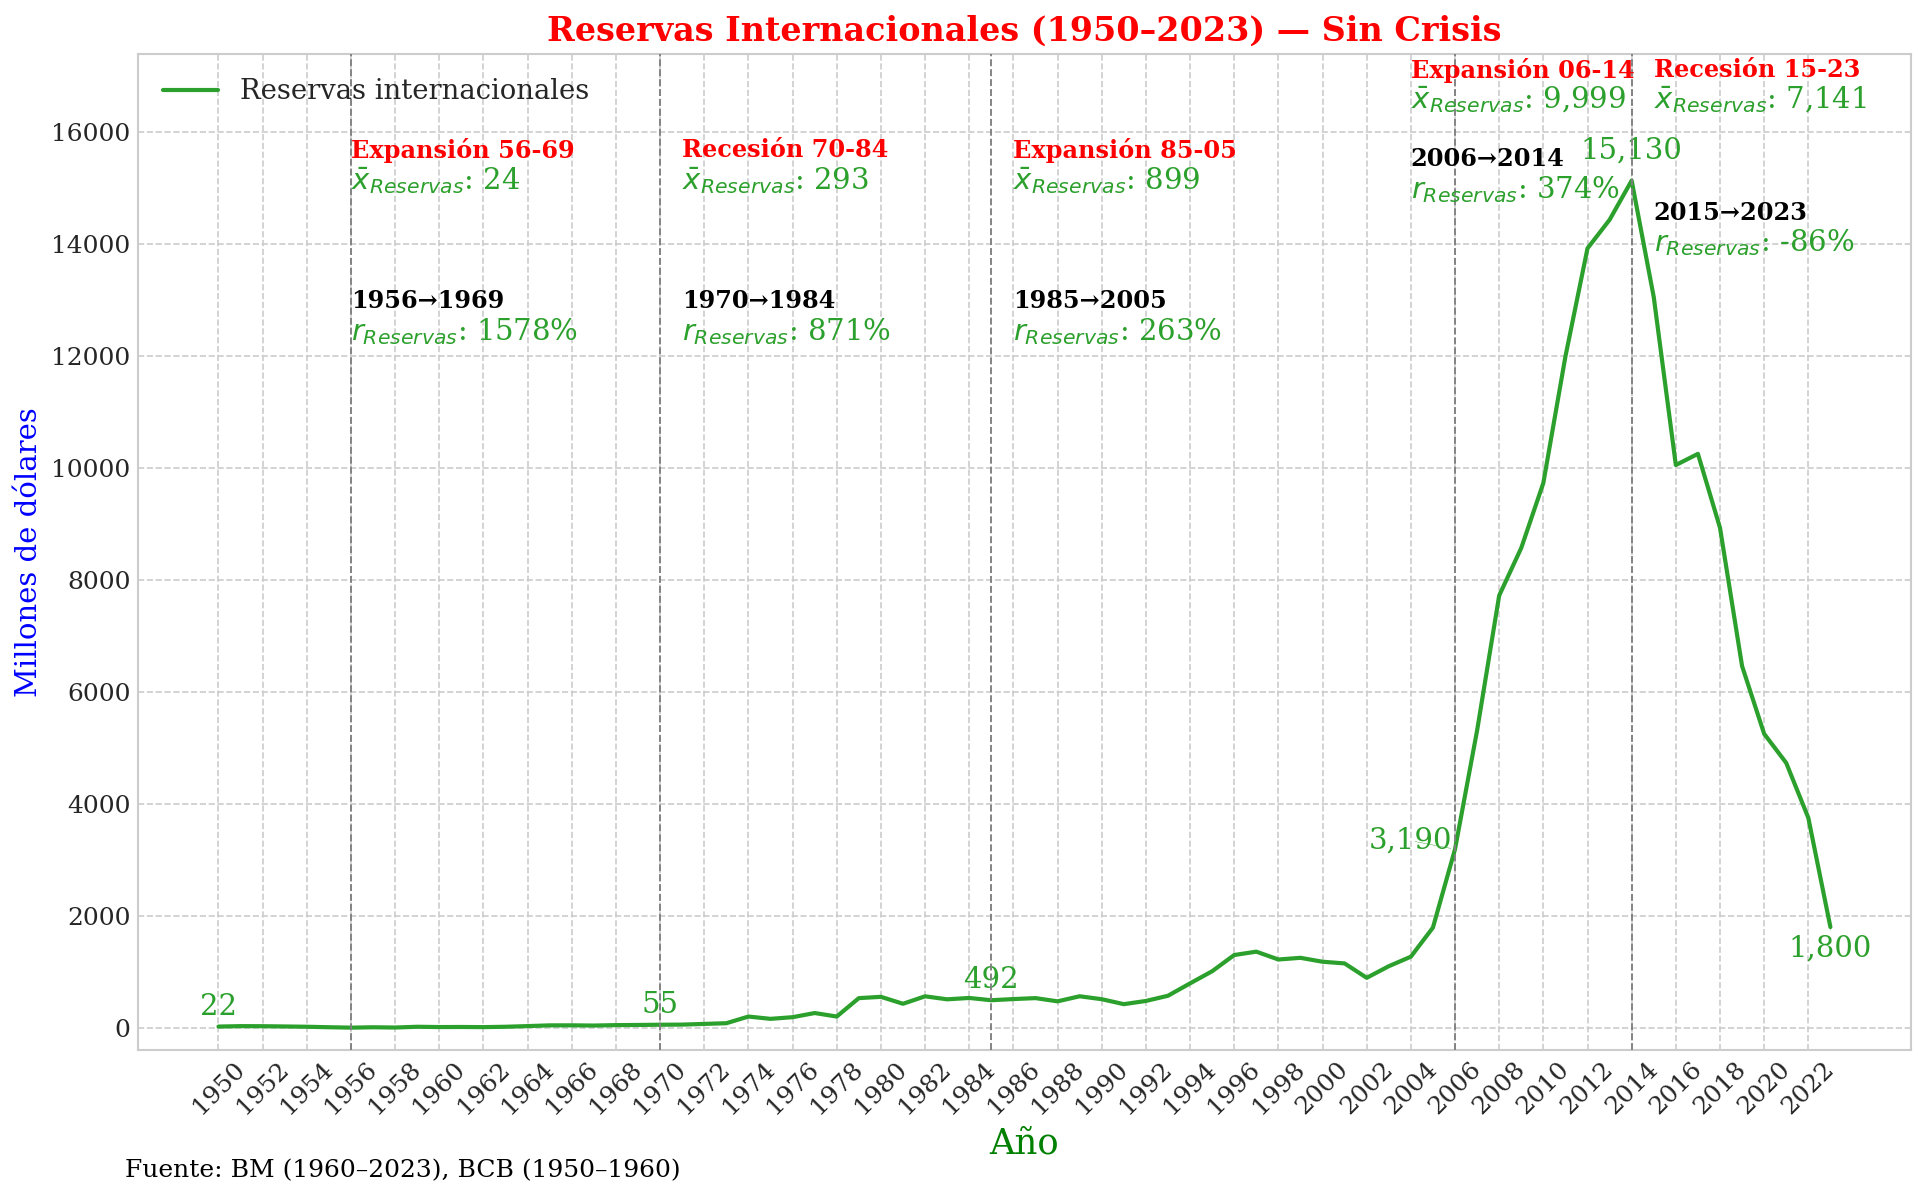

In [3]:
# ============================================================
# 2) SIN CRISIS
# ============================================================
annotate_years_sin_crisis = adjust_annot_years(df_res, annot_years_sin_crisis)
cycles_stats_sin_crisis   = {n: df_res.loc[s, cols_componentes].mean().to_dict()
                             for n, s in adjust_cycles(df_res, CYCLES_SIN_CRISIS).items()}
periodos_sin_crisis       = adjust_periods(df_res, periodos_tasas_sin_crisis)

annotation_offsets_sin_crisis = {
    'reservas_totales': {
        1950: (0, 350),
        1970: (0, 350),
        1985: (0, 370),
        2006: (-2, 150),
        2014: (0, 540),
        2023: (0, -380),
    }
}

hitos_offset_sin_crisis = {y: 0.8 for y in hitos_v_sin_crisis}

medias_offsets_sin_crisis = {
    'Expansión 56-69': (1956, 1),
    'Recesión 70-84':  (1971, 1),
    'Expansión 85-05': (1986, 1),
    'Expansión 06-14': (2004, 1.09),
    'Recesión 15-23':  (2015, 1.09),
}

tasas_offsets_sin_crisis = {
    '1956-1969': (1956, 0.83),
    '1970-1984': (1971, 0.83),
    '1985-2005': (1986, 0.83),
    '2006-2014': (2004, 0.99),
    '2015-2023': (2015, 0.93),
}

fig, ax = init_base_plot(
    df_res, componentes, custom_colors,
    "Reservas Internacionales (1950–2023) — Sin Crisis",
    "Año", "Millones de dólares",
    source_text="Fuente: BM (1960–2023), BCB (1950–1960)"
)
add_hitos(ax, df_res.index, hitos_v_sin_crisis, hitos_offset_sin_crisis, line_kwargs={'lw':0.9})
add_cycle_means_multi(ax, cycles_stats_sin_crisis, medias_offsets_sin_crisis,
                      abbr_map, custom_colors, line_spacing=ax.get_ylim()[1]*0.03)
add_year_value_annotations(ax, df_res, annotate_years_sin_crisis, cols_componentes,
                           annotation_offsets_sin_crisis, custom_colors, arrow_lw=0.2)
add_period_growth_annotations_multi(ax, df_res, periodos_sin_crisis, cols_componentes,
                                    tasas_offsets_sin_crisis, custom_colors, abbr_map)
ax.set_ylim(-400, df_res['reservas_totales'].max()*1.15)
plt.savefig(os.path.join(output_dir, "reservas_sin_crisis.png"))
plt.show() 
plt.close()

In [4]:
def update_cycles(
    original: dict[str, slice],
    rename_map: dict[str, str] = {},
    rename_values: dict[str, slice] = {},
    add_map:    dict[str, slice] = {}
) -> dict[str, slice]:
    """
    Idempotentemente:
      1) Renombra claves según rename_map,
         y si rename_values[new_key] existe, usa ese slice en lugar del original.
      2) Añade nuevos pares clave→slice de add_map.
    """
    out = original.copy()

    # 1) Renombrar (y opcionalmente cambiar valor)
    for old_key, new_key in rename_map.items():
        if old_key in out and new_key not in out:
            # Extraigo el slice antiguo...
            val = out.pop(old_key)
            # ...pero si hay override en rename_values, lo uso:
            val = rename_values.get(new_key, val)
            out[new_key] = val

    # 2) Añadir nuevos periodos
    for key, sl in add_map.items():
        if key not in out:
            out[key] = sl

    return out


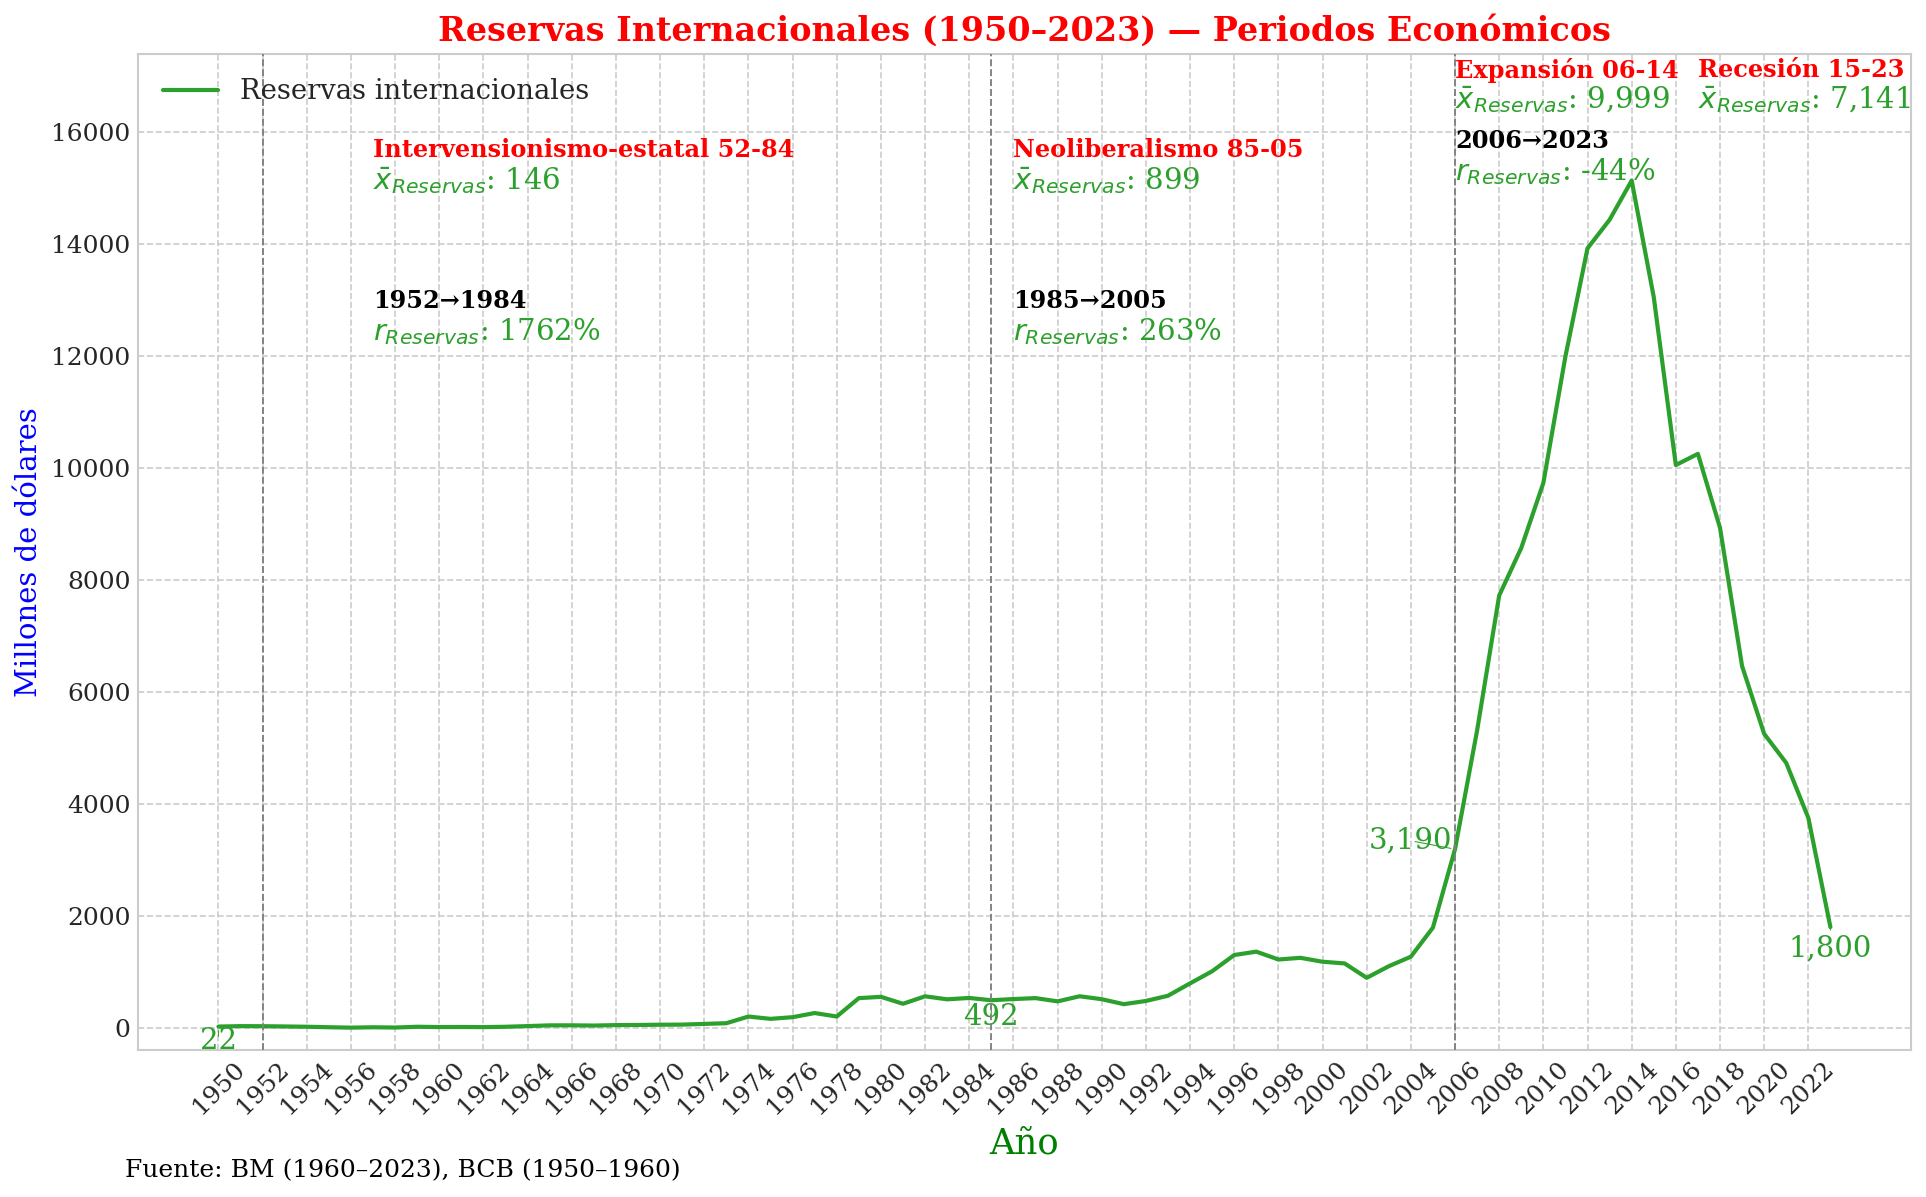

In [5]:
# ============================================================
# 3) PERIODOS ESTRUCTURALES
# ============================================================
annotate_years_periodos = adjust_annot_years(df_res, annot_years_periodos)
CYCLES_PERIODOS = update_cycles(
    original       = CYCLES_PERIODOS,
    rename_map     = {"Neodesarrollismo 06-24": "Expansión 06-14"},
    rename_values  = {"Expansión 06-14": slice(2006, 2014)},
    add_map        = {"Recesión 15-24":   slice(2015, 2024)},
)



cycles_stats_periodos   = {n: df_res.loc[s, cols_componentes].mean().to_dict()
                           for n, s in adjust_cycles(df_res, CYCLES_PERIODOS).items()}

periodos_periodos       = adjust_periods(df_res, periodos_tasas_periodos)

annotation_offsets_periodos = {
    'reservas_totales': {
        1950: (0, -250), 1985: (0, -300), 2006: (-2, 150), 2023: (0, -380),
    }
}

hitos_offset_periodos   = {a: 0.8 for a in hitos_v_periodos}
medias_offsets_periodos = {
    'Intervensionismo-estatal 52-84': (1957, 1),
    'Neoliberalismo 85-05':   (1986, 1),
    'Expansión 06-14': (2006, 1.09),
    'Recesión 15-23':  (2017, 1.09),  # antes "Recesión 14-23"
}

tasas_offsets_periodos  = {
    '1952-1984': (1957, 0.83),
    '1985-2005': (1986, 0.83),
    '2006-2023': (2006, 1.01),
}

fig, ax = init_base_plot(
    df_res, componentes, custom_colors,
    "Reservas Internacionales (1950–2023) — Periodos Económicos",
    "Año", "Millones de dólares",
    source_text="Fuente: BM (1960–2023), BCB (1950–1960)"
)
add_hitos(ax, df_res.index, hitos_v_periodos, hitos_offset_periodos, line_kwargs={'lw':0.9})
add_cycle_means_multi(ax, cycles_stats_periodos, medias_offsets_periodos,
                      abbr_map, custom_colors, line_spacing=ax.get_ylim()[1]*0.03)
add_year_value_annotations(ax, df_res, annotate_years_periodos, cols_componentes,
                           annotation_offsets_periodos, custom_colors, arrow_lw=0.5)
add_period_growth_annotations_multi(ax, df_res, periodos_periodos, cols_componentes,
                                    tasas_offsets_periodos, custom_colors, abbr_map)
ax.set_ylim(-400, df_res['reservas_totales'].max()*1.15)
plt.savefig(os.path.join(output_dir, "reservas_periodos.png"))
plt.show()
plt.close()

In [6]:
cycles_stats_periodos 

{'Intervensionismo-estatal 52-84': {'reservas_totales': 146.45774329242423},
 'Neoliberalismo 85-05': {'reservas_totales': 898.7350208571429},
 'Expansión 06-14': {'reservas_totales': 9998.888888888889},
 'Recesión 15-23': {'reservas_totales': 7141.111111111111}}